## EDA for dataset

In [1]:
import pandas as pd 
import numpy as np
from steps.step1_basic_data_inspection import DataInspectionStrategy, DataTypesInspectionStrategy, DataInspector, SummaryStatisticsInspectionStrategy
from steps.step2_missing_values_inspection import SimpleMissingValueAnalysis, MissingValuesTemplate
from steps.step3_univariate_inspection import NumericalUnivariateAnalysis, UnivariateAnalyzer, UnivariateAnalysisStrategy, FeatureUniqueValues
from steps.step4_bivariate_inspection import NumericalBivariateAnalysis, BivariateAnalysisStrategy, BivariateAnalyzer
from steps.step5_multivariate_inspection import SimpleMultivariateAnalysis, MultivariateAnalysisTemplate
from steps.step6_model_suggestion import ModelSuggester, ModelSuggestionStrategy, HeatmapStrategy, PairPlotsStrategy

In [2]:
datapath = (r"C:\Users\Junior\OneDrive\Desktop\Heart-Attack-Prediction-Model\heart_attack_dataset.csv")
df = pd.read_csv(datapath)

## Datatypes Inspection

In [4]:

#Step 1: Basic data types Inspection 
#---------------------------------------------------------------------------#
#Initialise the data inspector with a specific strategy
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.2 KB
None


In [5]:
## Print Data Columns and their datatypes for schema file 
print(df.dtypes.to_dict())

{'age': dtype('int64'), 'sex': dtype('int64'), 'total_cholesterol': dtype('float64'), 'ldl': dtype('float64'), 'hdl': dtype('float64'), 'systolic_bp': dtype('float64'), 'diastolic_bp': dtype('float64'), 'smoking': dtype('int64'), 'diabetes': dtype('int64'), 'heart_attack': dtype('int64')}


## Statistical Summary

In [6]:
# Step 1: Basic data Inspection 
#---------------------------------------------------------------------------#
#Switch strategy to statistics and execute
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
               age         sex  total_cholesterol          ldl          hdl  \
count  1000.000000  1000.00000        1000.000000  1000.000000  1000.000000   
mean     49.886000     0.52700         201.087486   130.047807    49.811244   
std      14.209466     0.49952          40.042655    30.041659    10.247178   
min      18.000000     0.00000          84.165932    36.259745    20.600644   
25%      40.000000     0.00000         174.707208   111.963197    42.622102   
50%      49.000000     1.00000         201.191547   130.678540    49.682809   
75%      59.000000     1.00000         226.251708   149.732446    56.703598   
max      94.000000     1.00000         354.660015   231.376631    82.319810   

       systolic_bp  diastolic_bp      smoking     diabetes  heart_attack  
count  1000.000000   1000.000000  1000.000000  1000.000000   1000.000000  
mean    120.312687     80.231248     0.202000     0.090000      0.104000  
std      15.507493   

## Step 2: Mising Values Inspection


 Missing Values Count by Column
Series([], dtype: int64)

 Visualising the missing Values


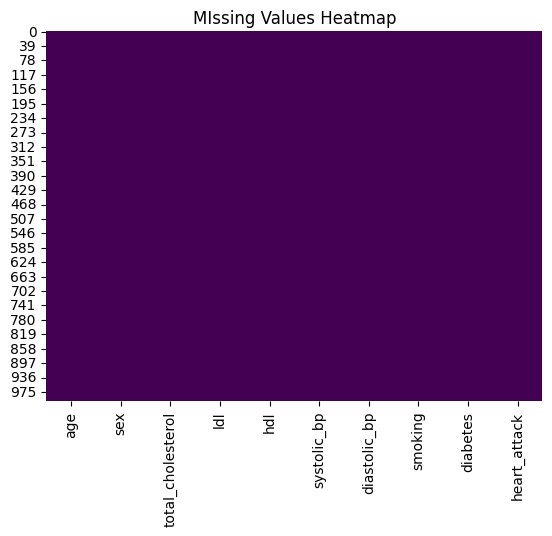

In [7]:
#Step 2: Missing Value Analysis 
# ----------------------------------------------------------#
#Perform missing value Analysis 
missing_value_analyzer = SimpleMissingValueAnalysis()
missing_value_analyzer.analyse(df)

## Step 3: Univariate Feature Inspection

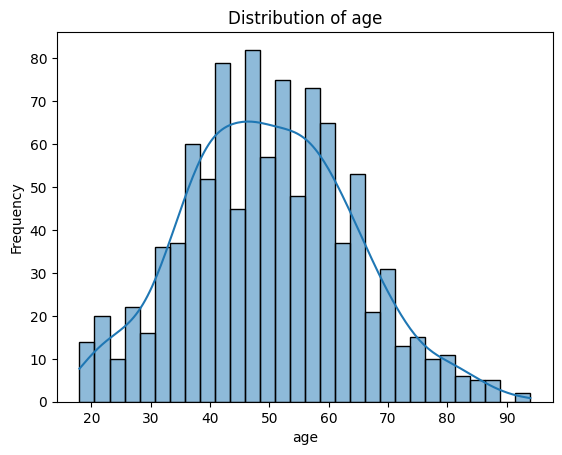

In [16]:
#Step 3: Univariate Feature Analysis 
#----------------------------------------------------------------------------#
#Analysing a numerical feature 1
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "age")

#This could work for categorical plots if they were available. 
#univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
#univariate_analyzer.execute_analysis(df, "gender")  # if 'gender' is categorical


## Step 4: Bivariate Feature Analysis 

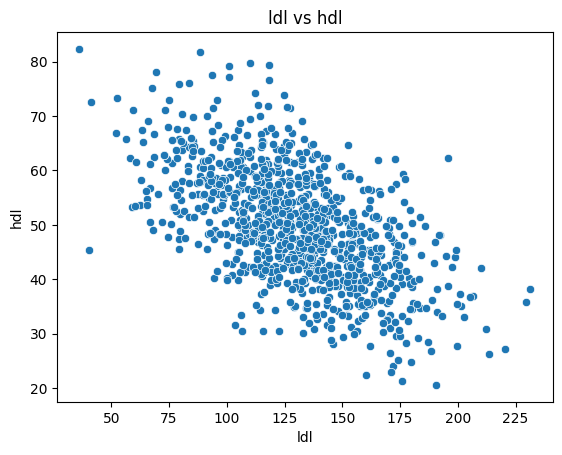

In [17]:
#Step 4: Bivariate Analysis 
#----------------------------------------------------------------------------#
#Analysing a relationship between two numerical features 
bivariate_analyzer = BivariateAnalyzer(NumericalBivariateAnalysis())
bivariate_analyzer.execute_analysis(df, "ldl", "hdl")

## Multivariate Feature Inspection

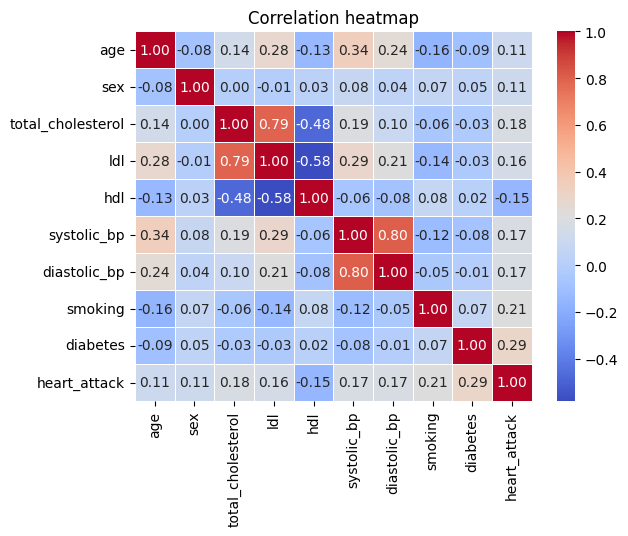

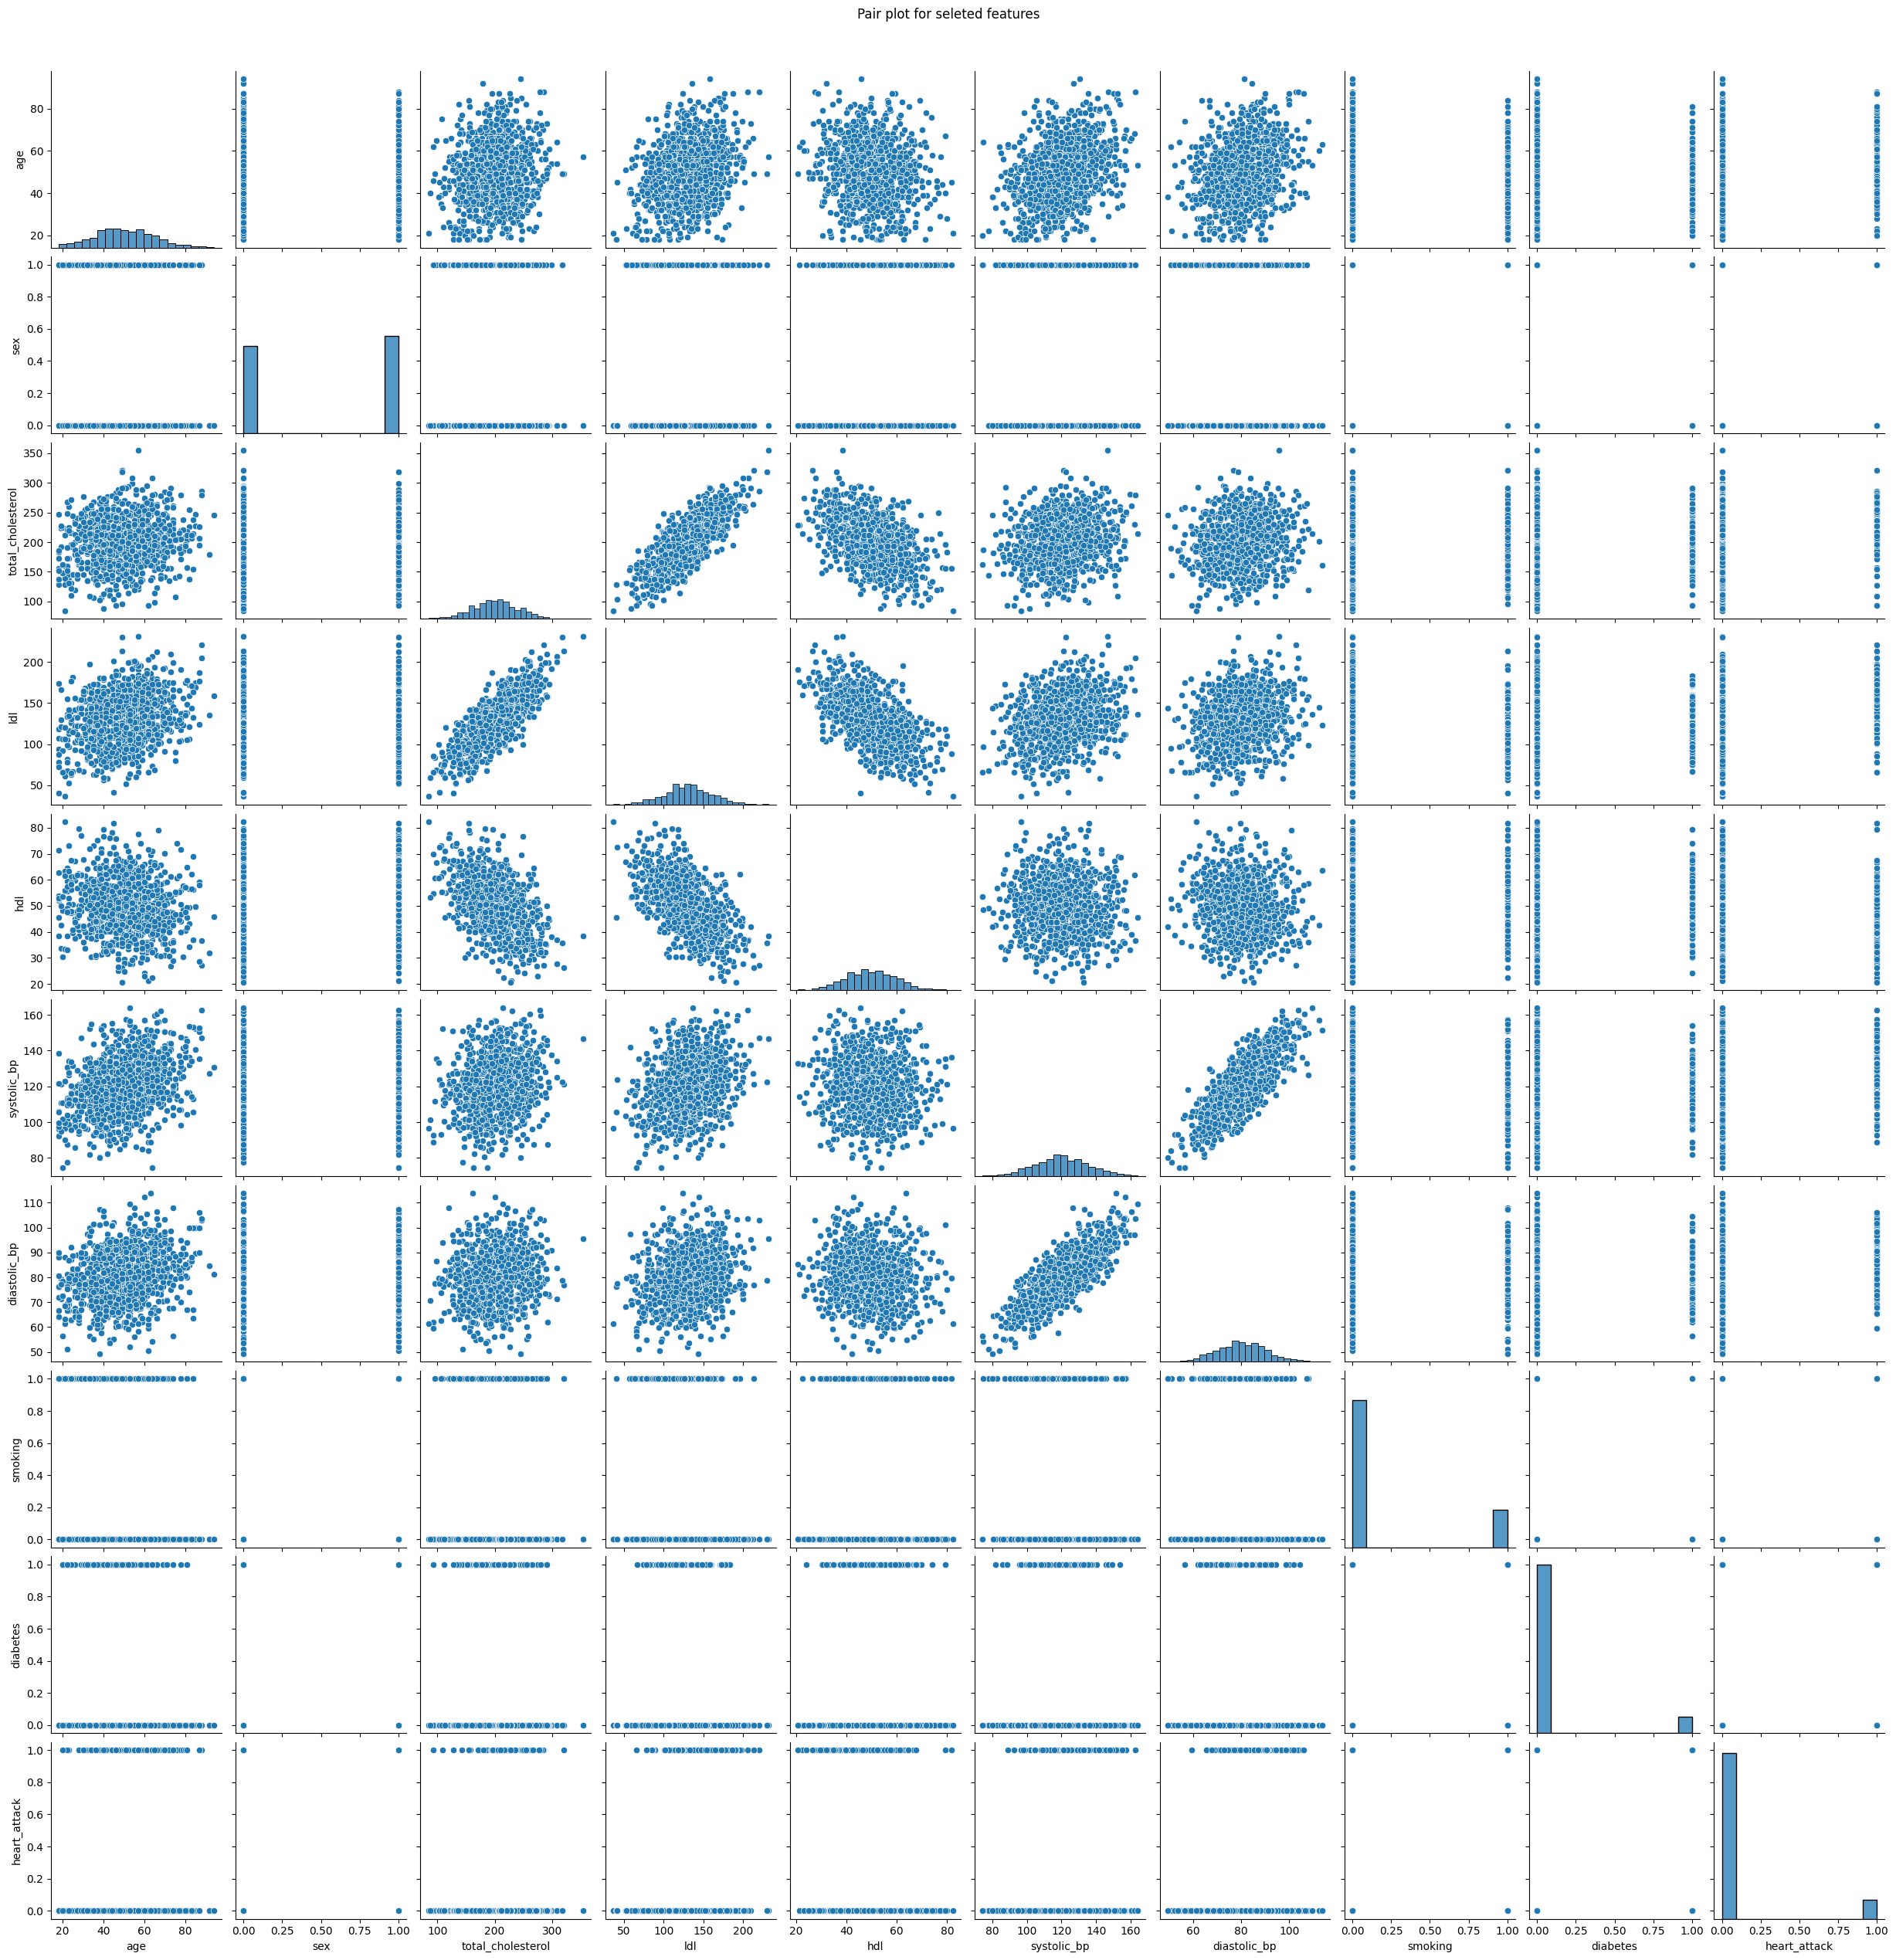

In [11]:
#Step 5: Multivariate Analysis 
#--------------------------------------------------------------------------------------------------------#
#Perform multivariate Analysis 
#Initialize multivariate analyzer with a simple multivariate Analysis 
multivariate_analyzer  = SimpleMultivariateAnalysis()
#Select important features for Analysis
selected_features = df[["age", "sex", "total_cholesterol", "ldl", "hdl", "systolic_bp", "diastolic_bp", "smoking", "diabetes", "heart_attack"]]
#Excute Multivariate Analysis 
multivariate_analyzer.analyse(selected_features)

<Figure size 1200x800 with 0 Axes>

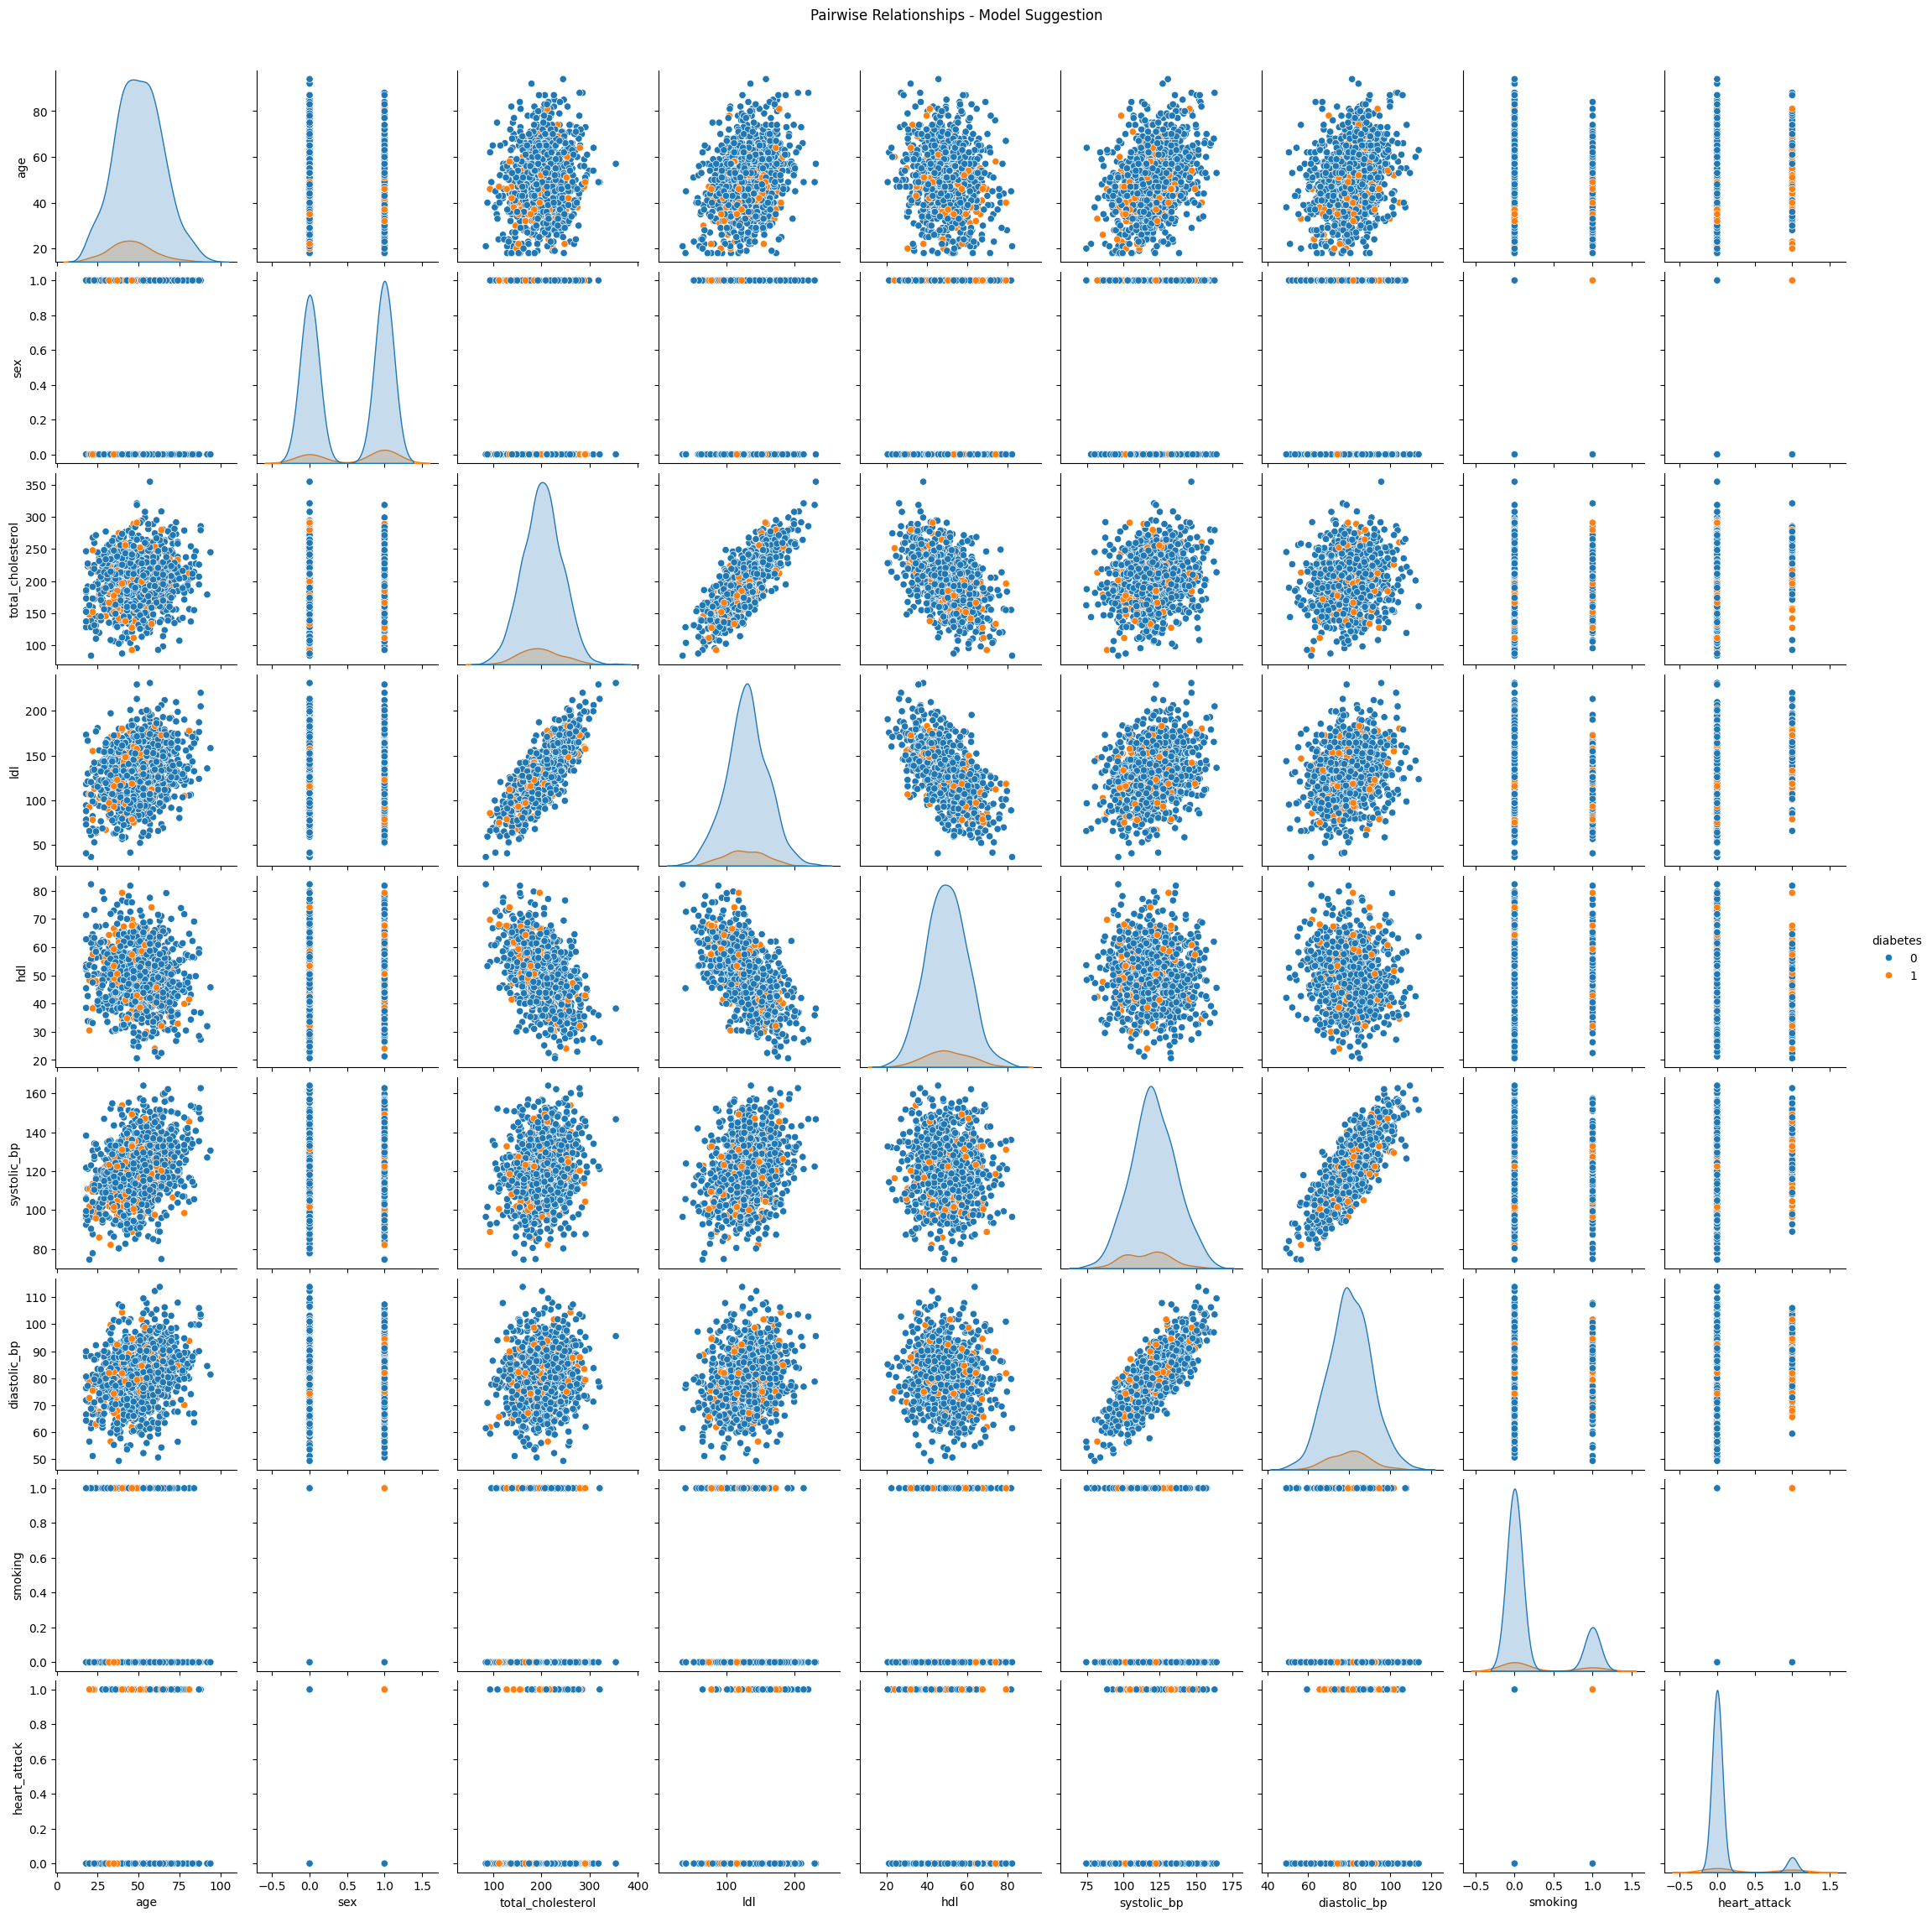

Model Suggestions based on PairPlots:
- If clear separation in target classes visible: Consider classification models
- If linear relationships visible: Consider linear models
- If complex non-linear patterns: Consider tree-based or neural network models


In [18]:
model_suggester = ModelSuggester(PairPlotsStrategy())
model_suggester.execute_suggestion(df, 'diabetes')

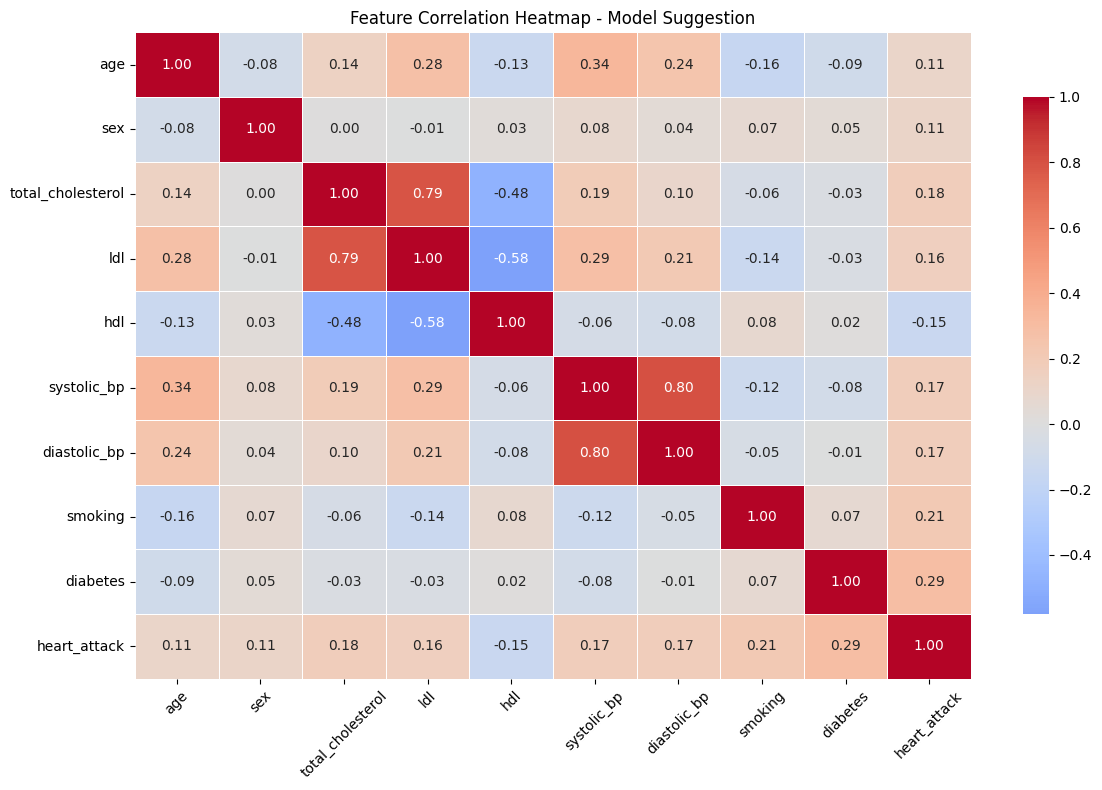


Model Suggestions based on Heatmap:
- High correlation with target: Good for linear models
- High multicollinearity: Consider regularization or feature selection
- Low feature correlations: May need complex models to capture patterns


In [13]:
model_suggester.set_strategy(HeatmapStrategy())
model_suggester.execute_suggestion(df, 'target')

## Suggestioons from EDA
1. The dataset is imbalanced based on the ditribution of values in target variable. This implies we should do standardization or scaling. 
2. Some features are showing multicolinearity not suitable for logistic regression. They have to be averaged. 
